In [18]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Visualization and evaluation libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
# ----------------------------------------
# Load and Explore the Dataset
# -------------------------------------
data=pd.read_csv("fake_news_dataset.csv")

In [29]:
#--------------------------------------------
# Display the first few rows to get an idea of the data
#----------------------------------------------------
print("Sample Data:")
data.head()

Sample Data:


,id,title,author,text,state,date_published,source,category,sentiment_score,word_count,...,num_shares,num_comments,political_bias,fact_check_rating,is_satirical,trust_score,source_reputation,clickbait_score,plagiarism_score,label
0,1,Breaking News 1,Jane Smith,This is the content of article 1. It contains ...,Tennessee,30-11-2021,The Onion,Entertainment,-0.22,1302,...,47305,450,Center,FALSE,1,76,6,0.84,53.35,Fake
1,2,Breaking News 2,Emily Davis,This is the content of article 2. It contains ...,Wisconsin,02-09-2021,The Guardian,Technology,0.92,322,...,39804,530,Left,Mixed,1,1,5,0.85,28.28,Fake
2,3,Breaking News 3,John Doe,This is the content of article 3. It contains ...,Missouri,13-04-2021,New York Times,Sports,0.25,228,...,45860,763,Center,Mixed,0,57,1,0.72,0.38,Fake
3,4,Breaking News 4,Alex Johnson,This is the content of article 4. It contains ...,North Carolina,08-03-2020,CNN,Sports,0.94,155,...,34222,945,Center,TRUE,1,18,10,0.92,32.20,Fake
4,5,Breaking News 5,Emily Davis,This is the content of article 5. It contains ...,California,23-03-2022,Daily Mail,Technology,-0.01,962,...,35934,433,Right,Mixed,0,95,6,0.66,77.70,Real


In [30]:
data.columns

Index(['id', 'title', 'author', 'text', 'state', 'date_published', 'source',
       'category', 'sentiment_score', 'word_count', 'char_count', 'has_images',
       'has_videos', 'readability_score', 'num_shares', 'num_comments',
       'political_bias', 'fact_check_rating', 'is_satirical', 'trust_score',
       'source_reputation', 'clickbait_score', 'plagiarism_score', 'label'],
      dtype='object')

In [31]:
data.isnull().sum()

id                   0
title                0
author               0
text                 0
state                0
date_published       0
source               0
category             0
sentiment_score      0
word_count           0
char_count           0
has_images           0
has_videos           0
readability_score    0
num_shares           0
num_comments         0
political_bias       0
fact_check_rating    0
is_satirical         0
trust_score          0
source_reputation    0
clickbait_score      0
plagiarism_score     0
label                0
dtype: int64

In [32]:
data.duplicated().sum()

np.int64(0)

In [35]:
#-------------------------------------------------------------------
# Optionally, you can check the overall details of the dataframe:
#------------------------------------------------------------
def check_df(dataframe, head=5):
    print("##### Shape #####")
    print(dataframe.shape)
    print("\n##### Data Types #####")
    print(dataframe.dtypes)
    print("\n##### Head #####")
    print(dataframe.head(head))
    print("\n##### Tail #####")
    print(dataframe.tail(head))
    print("\n##### Missing Values #####")
    print(dataframe.isnull().sum())
    print("\n##### Summary Statistics #####")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(data)

##### Shape #####
(4000, 24)

##### Data Types #####
id                     int64
title                 object
author                object
text                  object
state                 object
date_published        object
source                object
category              object
sentiment_score      float64
word_count             int64
char_count             int64
has_images             int64
has_videos             int64
readability_score    float64
num_shares             int64
num_comments           int64
political_bias        object
fact_check_rating     object
is_satirical           int64
trust_score            int64
source_reputation      int64
clickbait_score      float64
plagiarism_score     float64
label                 object
dtype: object

##### Head #####
   id            title        author  \
0   1  Breaking News 1    Jane Smith   
1   2  Breaking News 2   Emily Davis   
2   3  Breaking News 3      John Doe   
3   4  Breaking News 4  Alex Johnson   
4   5  Breaking New

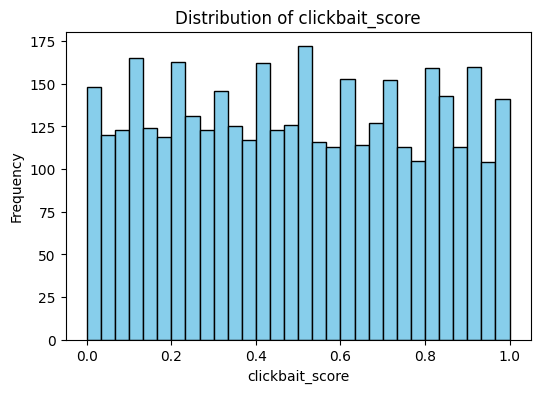

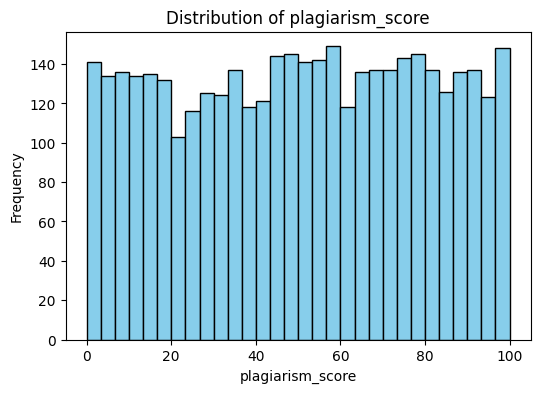

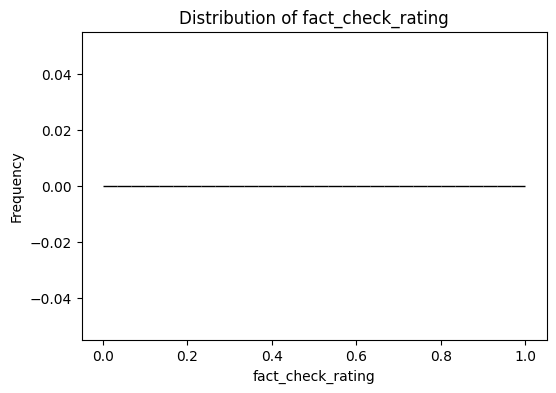

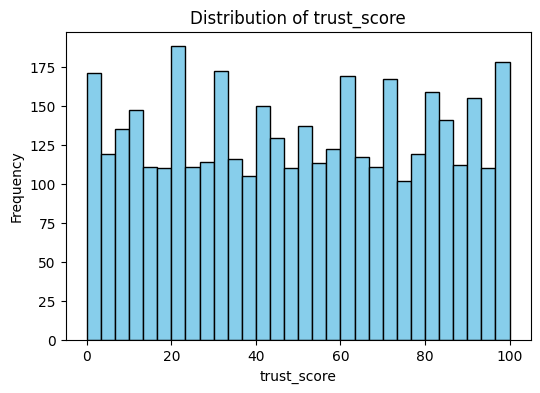

In [48]:
cols = ['clickbait_score', 'plagiarism_score', 'fact_check_rating', 'trust_score']
for col in cols:
    plt.figure(figsize=(6,4))
    plt.hist(data[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


Correlation matrix for numeric columns:
                         id  sentiment_score  word_count  char_count  \
id                 1.000000         0.028511    0.029620    0.012643   
sentiment_score    0.028511         1.000000   -0.003991    0.009844   
word_count         0.029620        -0.003991    1.000000   -0.012238   
char_count         0.012643         0.009844   -0.012238    1.000000   
has_images         0.006378        -0.024369    0.028572   -0.022457   
has_videos         0.015019        -0.015398    0.009068    0.021137   
readability_score -0.001843        -0.002532    0.012947    0.000212   
num_shares        -0.005048         0.029162    0.001133    0.012026   
num_comments       0.008742        -0.021847    0.001400   -0.015914   
fact_check_rating       NaN              NaN         NaN         NaN   
is_satirical      -0.011584         0.011913   -0.000479    0.007156   
trust_score       -0.007483         0.003390    0.002843    0.002987   
source_reputation  0.018

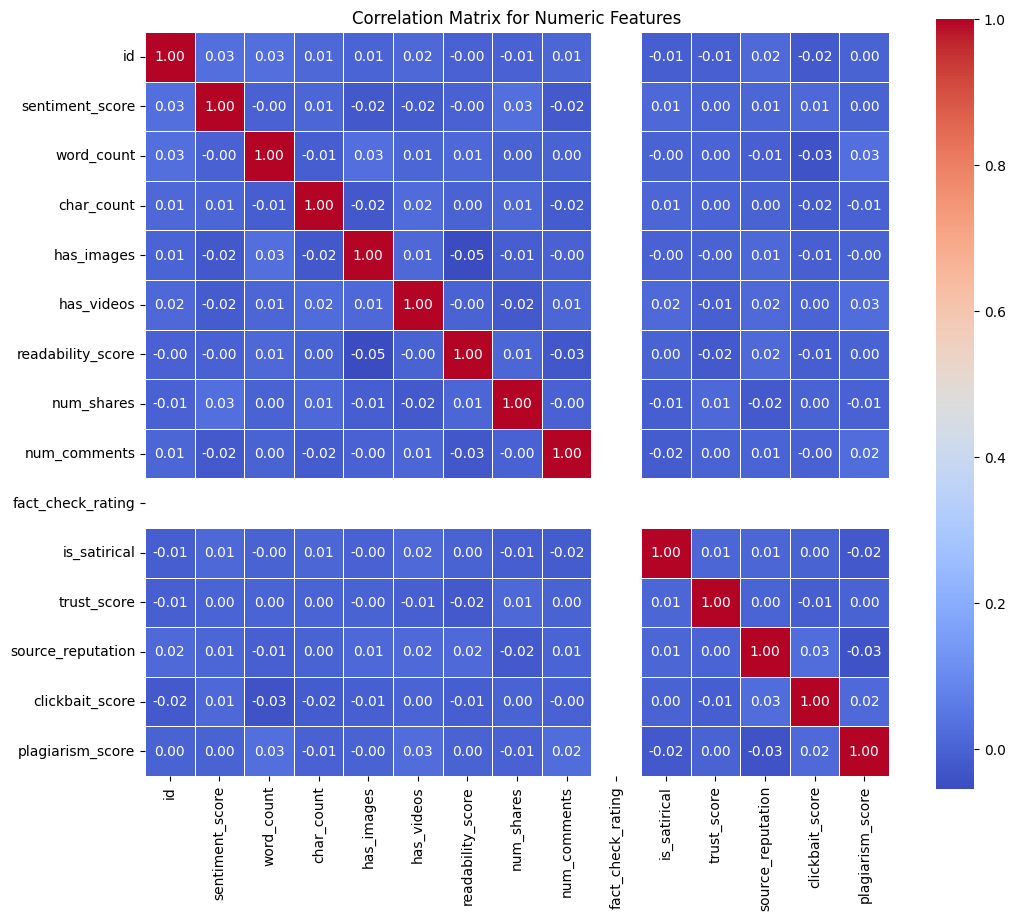

In [50]:
# Extract only the numeric columns
numeric_cols = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_cols.corr()

# Print the correlation matrix
print("Correlation matrix for numeric columns:")
print(corr_matrix)

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True, linewidths=.5)
plt.title("Correlation Matrix for Numeric Features")
plt.savefig("correlation_matrix.png")
plt.show()

In [51]:
# List of columns that should be numeric
cols_to_convert = ['fact_check_rating', 'trust_score', 'clickbait_score', 
            'plagiarism_score', 'readability_score', 'sentiment_score']

# Convert the listed columns to numeric, turning errors into NaN
for col in cols_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')


In [54]:
# ----------------------------------------
# Rule-Based Classification
# ----------------------------------------
def improved_rule_based_classification(row):
    clickbait = float(row['clickbait_score'])
    plagiarism = float(row['plagiarism_score'])
    fact_check = float(row['fact_check_rating'])
    trust = float(row['trust_score'])
    readability = float(row['readability_score'])
    sentiment = float(row['sentiment_score'])
    
    # Base rules
    if (clickbait > 0.55 and plagiarism > 0.55) or (fact_check < 0.4 and clickbait > 0.5):
        label = 'Fake'
    elif trust < 0.4:
        label = 'Fake'
    else:
        label = 'Real'
    
    # Additional condition(s)
    # For example, very low readability or highly negative sentiment might push the label towards Fake
    if readability < 30 or sentiment < -0.5:
        label = 'Fake'
    
    return label

data['rule_based_label'] = data.apply(improved_rule_based_classification, axis=1)

In [55]:
# Apply the rule-based classification to each row
data['rule_based_label'] = data.apply(rule_based_classification, axis=1)

# Evaluate the rule-based approach
rule_based_accuracy = accuracy_score(data['label'], data['rule_based_label'])
print("\nRule-Based Classification Accuracy: {:.2f}%".format(rule_based_accuracy * 100))
print("\nRule-Based Classification Report:")
print(classification_report(data['label'], data['rule_based_label']))


Rule-Based Classification Accuracy: 50.82%

Rule-Based Classification Report:
              precision    recall  f1-score   support

        Fake       0.51      0.58      0.55      2026
        Real       0.50      0.43      0.46      1974

    accuracy                           0.51      4000
   macro avg       0.51      0.51      0.50      4000
weighted avg       0.51      0.51      0.51      4000



In [61]:
data.columns

Index(['id', 'title', 'author', 'text', 'state', 'date_published', 'source',
       'category', 'sentiment_score', 'word_count', 'char_count', 'has_images',
       'has_videos', 'readability_score', 'num_shares', 'num_comments',
       'political_bias', 'fact_check_rating', 'is_satirical', 'trust_score',
       'source_reputation', 'clickbait_score', 'plagiarism_score', 'label',
       'rule_based_label'],
      dtype='object')

In [17]:
# Evaluate model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.51375
Classification Report:
               precision    recall  f1-score   support

        Fake       0.51      1.00      0.68       411
        Real       0.00      0.00      0.00       389

    accuracy                           0.51       800
   macro avg       0.26      0.50      0.34       800
weighted avg       0.26      0.51      0.35       800



C:\Users\Alvin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Alvin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Alvin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Confusion Matrix:
[[1181  845]
 [1122  852]]


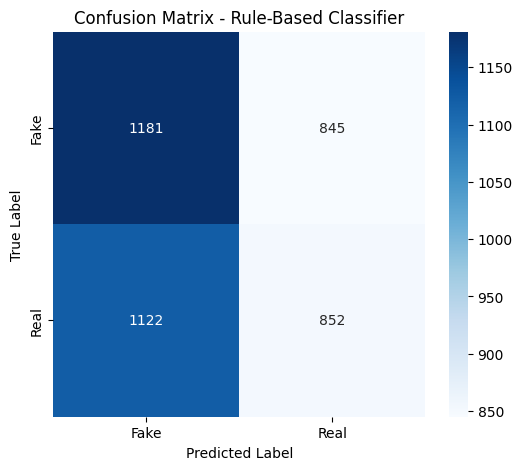

In [64]:
# ---------------------------
# Visualize the Confusion Matrix
# ---------------------------
# Compute the confusion matrix from your rule-based predictions.
cm = confusion_matrix(data['label'], data['rule_based_label'], labels=['Fake', 'Real'])
print("\nConfusion Matrix:")
print(cm)

# Plot the confusion matrix as a heatmap.
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", 
            xticklabels=['Fake', 'Real'],
            yticklabels=['Fake', 'Real'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix - Rule-Based Classifier')
plt.savefig("rule_based_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

In [65]:
# ---------------------------
# Analyze Misclassified Examples
# ---------------------------
# Add a new column to flag misclassifications.
data['misclassified'] = (data['label'] != data['rule_based_label'])

# Print a few misclassified rows for inspection.
misclassified_examples = data[data['misclassified']]
print("\nSample of Misclassified Examples:")
print(misclassified_examples[['id', 'title', 'label', 'rule_based_label',
                              'fact_check_rating', 'trust_score', 'clickbait_score',
                              'plagiarism_score', 'readability_score', 'sentiment_score']].head(10))


Sample of Misclassified Examples:
    id             title label rule_based_label  fact_check_rating  \
2    3   Breaking News 3  Fake             Real                0.0   
4    5   Breaking News 5  Real             Fake                0.0   
5    6   Breaking News 6  Fake             Real                0.0   
6    7   Breaking News 7  Fake             Real                0.0   
7    8   Breaking News 8  Real             Fake                0.0   
9   10  Breaking News 10  Real             Fake                0.0   
12  13  Breaking News 13  Real             Fake                0.0   
13  14  Breaking News 14  Fake             Real                0.0   
14  15  Breaking News 15  Fake             Real                0.0   
16  17  Breaking News 17  Real             Fake                0.0   

    trust_score  clickbait_score  plagiarism_score  readability_score  \
2            57             0.72              0.38              30.04   
4            95             0.66             77.

In [68]:
# ---------------------------
#Compare with a Supervised Model
# ---------------------------
# Using the same six features:
important_features = ['fact_check_rating', 'trust_score', 'clickbait_score', 
                      'plagiarism_score', 'readability_score', 'sentiment_score']

# Ensure the features are numeric
for col in important_features:
    data[col] = pd.to_numeric(data[col], errors='coerce').fillna(0)
    
X = data[important_features]
y = data['rule_based_label']

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train a RandomForest classifier.
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate the model.
y_pred_ml = clf.predict(X_test)
ml_accuracy = accuracy_score(y_test, y_pred_ml)
print("\nRandom Forest Model Accuracy: {:.2f}%".format(ml_accuracy * 100))
print("\nRandom Forest Model Classification Report:")
print(classification_report(y_test, y_pred_ml))


Random Forest Model Accuracy: 99.83%

Random Forest Model Classification Report:
              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00       691
        Real       1.00      1.00      1.00       509

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200



In [70]:
# Segment the articles based on `trust_score` into quartiles.
data["SEGMENT"] = pd.qcut(data["trust_score"], 4, labels=["D", "C", "B", "A"])

# Display the first few rows to check segmentation
print("DataFrame with SEGMENT:")
print(data[["id", "title", "trust_score", "SEGMENT"]].head())

# Analyze statistics for each segment
segment_summary = data.groupby("SEGMENT")["trust_score"].agg(['count', 'mean', 'min', 'max'])
print("\nSegment Summary:")
print(segment_summary)


DataFrame with SEGMENT:
   id            title  trust_score SEGMENT
0   1  Breaking News 1           76       B
1   2  Breaking News 2            1       D
2   3  Breaking News 3           57       B
3   4  Breaking News 4           18       D
4   5  Breaking News 5           95       A

Segment Summary:
         count       mean  min  max
SEGMENT                            
D         1017  11.984267    0   24
C         1003  37.386839   25   50
B         1006  63.552684   51   76
A          974  88.523614   77  100
